In [1]:
import tensorflow as tf
import os

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
import numpy as numpy
import matplotlib.pyplot as plt
import os

In [5]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 4000 files belonging to 8 classes.


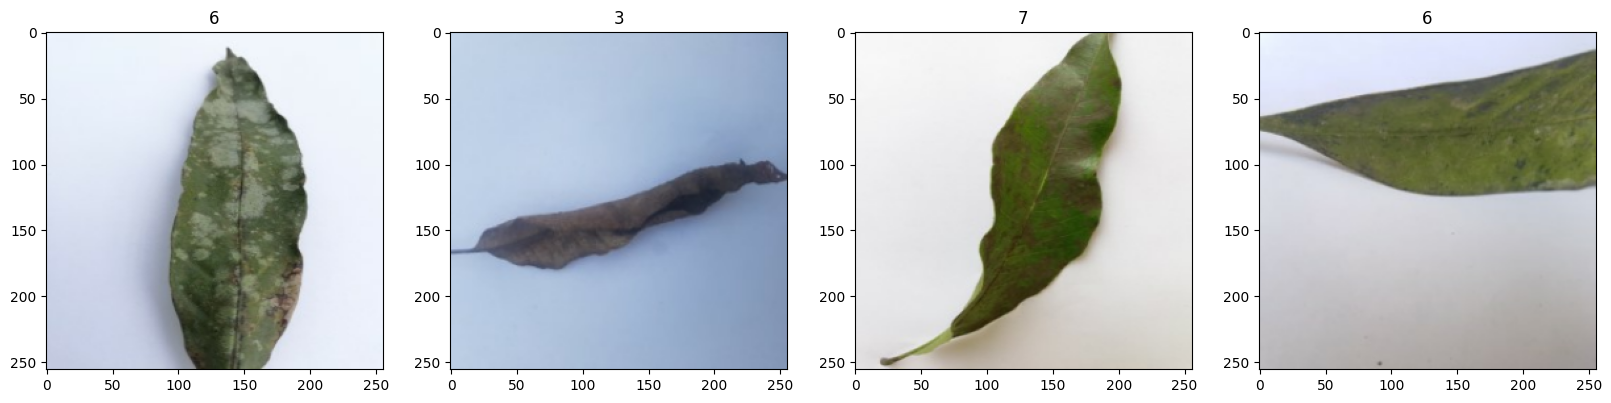

In [6]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

The tensorflow image dataset from directory loads each directory images into a different class, which is desired for us as well. It assings the classes by alphanumeric order of directory names. To see which class refers to which number we can do the following:

In [7]:
class_names = data.class_names
for i in range(len(class_names)):
    print(f'The {i}th class name is: {class_names[i]}')

The 0th class name is: Anthracnose
The 1th class name is: Bacterial Canker
The 2th class name is: Cutting Weevil
The 3th class name is: Die Back
The 4th class name is: Gall Midge
The 5th class name is: Healthy
The 6th class name is: Powdery Mildew
The 7th class name is: Sooty Mould


In [8]:
#Scale our data as images contains 0-255 values
#Luckily the tensorflow image dataset load method includes map method as well
scale_data=data.map(lambda x,y: (x/255,y))

## Creating train, validation and test groups

In [9]:
len(data)

125

Our data has 125 batches. We will use %70 train %20 validation and %10 test split.

In [10]:
train_split=int(len(data)*.7)
validation_split=int(len(data)*.2)
test_split=len(data)-train_split-validation_split

In [11]:
#Check total batch numbers in splits and if our total split batch number equals back to 125:
print(train_split)
print(validation_split)
print(test_split)
print(train_split+validation_split+test_split)

87
25
13
125


In [12]:
#And now lets assign data batches to groups:
train=scale_data.take(train_split)
validation=scale_data.skip(train_split).take(validation_split)
test=scale_data.skip(train_split+validation_split).take(test_split)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model=Sequential()
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [17]:
logdir='logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=2, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/2
87/87 [==============================] - 74s 373ms/step - loss: 1.1803 - accuracy: 0.5535 - val_loss: 0.8924 - val_accuracy: 0.6988
Epoch 2/2
87/87 [==============================] - 32s 360ms/step - loss: 0.6015 - accuracy: 0.7834 - val_loss: 0.4592 - val_accuracy: 0.8575


# Second run, complex model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation

model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Dense Layer 1
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Dense Layer 2
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(8, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)    

In [22]:
hist = model.fit(train, epochs=20, validation_data=validation, callbacks=[tensorboard_callback])

Epoch 1/20
87/87 [==============================] - 37s 378ms/step - loss: 0.8521 - accuracy: 0.7134 - val_loss: 4.6551 - val_accuracy: 0.1138
Epoch 2/20
87/87 [==============================] - 36s 393ms/step - loss: 0.3753 - accuracy: 0.8725 - val_loss: 6.1029 - val_accuracy: 0.1150
Epoch 3/20
87/87 [==============================] - 38s 420ms/step - loss: 0.2708 - accuracy: 0.9102 - val_loss: 5.8278 - val_accuracy: 0.1350
Epoch 4/20
87/87 [==============================] - 36s 397ms/step - loss: 0.2146 - accuracy: 0.9332 - val_loss: 5.3927 - val_accuracy: 0.1875
Epoch 5/20
87/87 [==============================] - 42s 472ms/step - loss: 0.1523 - accuracy: 0.9468 - val_loss: 2.7078 - val_accuracy: 0.3187
Epoch 6/20
87/87 [==============================] - 38s 421ms/step - loss: 0.1734 - accuracy: 0.9440 - val_loss: 2.4957 - val_accuracy: 0.4038
Epoch 7/20
87/87 [==============================] - 43s 477ms/step - loss: 0.1326 - accuracy: 0.9533 - val_loss: 1.2100 - val_accuracy: 0.6963